In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/ANANDHU/OneDrive/Desktop/Documents/capstone_project_BIA/heart_attack_youngsters_india.csv')
data.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),HeartAttack_Chance
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,High,137.5/110.7,76,Normal,Non-anginal,118,No,97.1,341,No
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,Low,138.3/76.6,86,Normal,Typical,164,No,92.7,373,Yes
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,Low,130.7/108.8,73,Normal,Atypical,216,No,94.9,235,No


## Splitting Blood Pressure (systolic/diastolic mmHg) Into Systolic_BP, Diastolic_BP And Drop Blood Pressure (systolic/diastolic mmHg) Column

In [3]:
data[['Systolic_BP', 'Diastolic_BP']] = data['Blood Pressure (systolic/diastolic mmHg)'].str.split('/', expand=True)
data['Systolic_BP'] = pd.to_numeric(data['Systolic_BP'], errors='coerce').astype(float)
data['Diastolic_BP'] = pd.to_numeric(data['Diastolic_BP'], errors='coerce').astype(float)
data = data.drop('Blood Pressure (systolic/diastolic mmHg)', axis=1)
data.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),HeartAttack_Chance,Systolic_BP,Diastolic_BP
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,82,Normal,Non-anginal,183,No,94.1,58,No,177.0,63.1
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,76,Normal,Non-anginal,118,No,97.1,341,No,137.5,110.7
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,86,Normal,Typical,164,No,92.7,373,Yes,138.3,76.6
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,106,Normal,Non-anginal,188,No,98.4,102,Yes,177.1,90.0
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,73,Normal,Atypical,216,No,94.9,235,No,130.7,108.8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              10000 non-null  int64  
 1   Gender                           10000 non-null  object 
 2   Region                           10000 non-null  object 
 3   Urban/Rural                      10000 non-null  object 
 4   SES                              10000 non-null  object 
 5   Smoking Status                   10000 non-null  object 
 6   Alcohol Consumption              10000 non-null  object 
 7   Diet Type                        10000 non-null  object 
 8   Physical Activity Level          10000 non-null  object 
 9   Screen Time (hrs/day)            10000 non-null  int64  
 10  Sleep Duration (hrs/day)         10000 non-null  int64  
 11  Family History of Heart Disease  10000 non-null  object 
 12  Diabetes           

In [5]:
# Check for null values in each column
data.isnull().sum()

Age                                0
Gender                             0
Region                             0
Urban/Rural                        0
SES                                0
Smoking Status                     0
Alcohol Consumption                0
Diet Type                          0
Physical Activity Level            0
Screen Time (hrs/day)              0
Sleep Duration (hrs/day)           0
Family History of Heart Disease    0
Diabetes                           0
Hypertension                       0
Cholesterol Levels (mg/dL)         0
BMI (kg/m²)                        0
Stress Level                       0
Resting Heart Rate (bpm)           0
ECG Results                        0
Chest Pain Type                    0
Maximum Heart Rate Achieved        0
Exercise Induced Angina            0
Blood Oxygen Levels (SpO2%)        0
Triglyceride Levels (mg/dL)        0
HeartAttack_Chance                 0
Systolic_BP                        0
Diastolic_BP                       0
d

In [6]:
# Generate descriptive statistics
data.describe()

,Age,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Resting Heart Rate (bpm),Maximum Heart Rate Achieved,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Systolic_BP,Diastolic_BP
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,26.601500,7.510700,6.489600,199.649000,27.44190,89.493400,159.683900,94.940730,275.010100,139.653120,89.732480
std,5.164239,4.626578,2.289327,57.561902,7.22374,17.318237,35.034037,2.883329,128.825994,23.189623,17.216746
min,18.000000,0.000000,3.000000,100.000000,15.00000,60.000000,100.000000,90.000000,50.000000,100.000000,60.000000
25%,22.000000,4.000000,4.000000,150.000000,21.20000,74.000000,129.000000,92.400000,164.000000,119.400000,75.000000
50%,27.000000,8.000000,6.000000,199.000000,27.50000,90.000000,160.000000,94.900000,277.000000,139.200000,89.450000
75%,31.000000,12.000000,8.000000,249.000000,33.70000,104.000000,190.000000,97.400000,385.000000,160.000000,104.500000
max,35.000000,15.000000,10.000000,300.000000,40.00000,119.000000,220.000000,100.000000,500.000000,180.000000,120.000000


In [7]:
data.duplicated().sum()


0

In [8]:
num=data.select_dtypes(include=['number']).columns
data[num].skew()

Age                           -0.014238
Screen Time (hrs/day)         -0.011737
Sleep Duration (hrs/day)       0.013890
Cholesterol Levels (mg/dL)    -0.000620
BMI (kg/m²)                    0.009420
Resting Heart Rate (bpm)      -0.002111
Maximum Heart Rate Achieved    0.008153
Blood Oxygen Levels (SpO2%)    0.025636
Triglyceride Levels (mg/dL)   -0.011710
Systolic_BP                    0.020026
Diastolic_BP                   0.022435
dtype: float64

# Exploratory Data Analysis (EDA)

## Taking a glance of data distributions

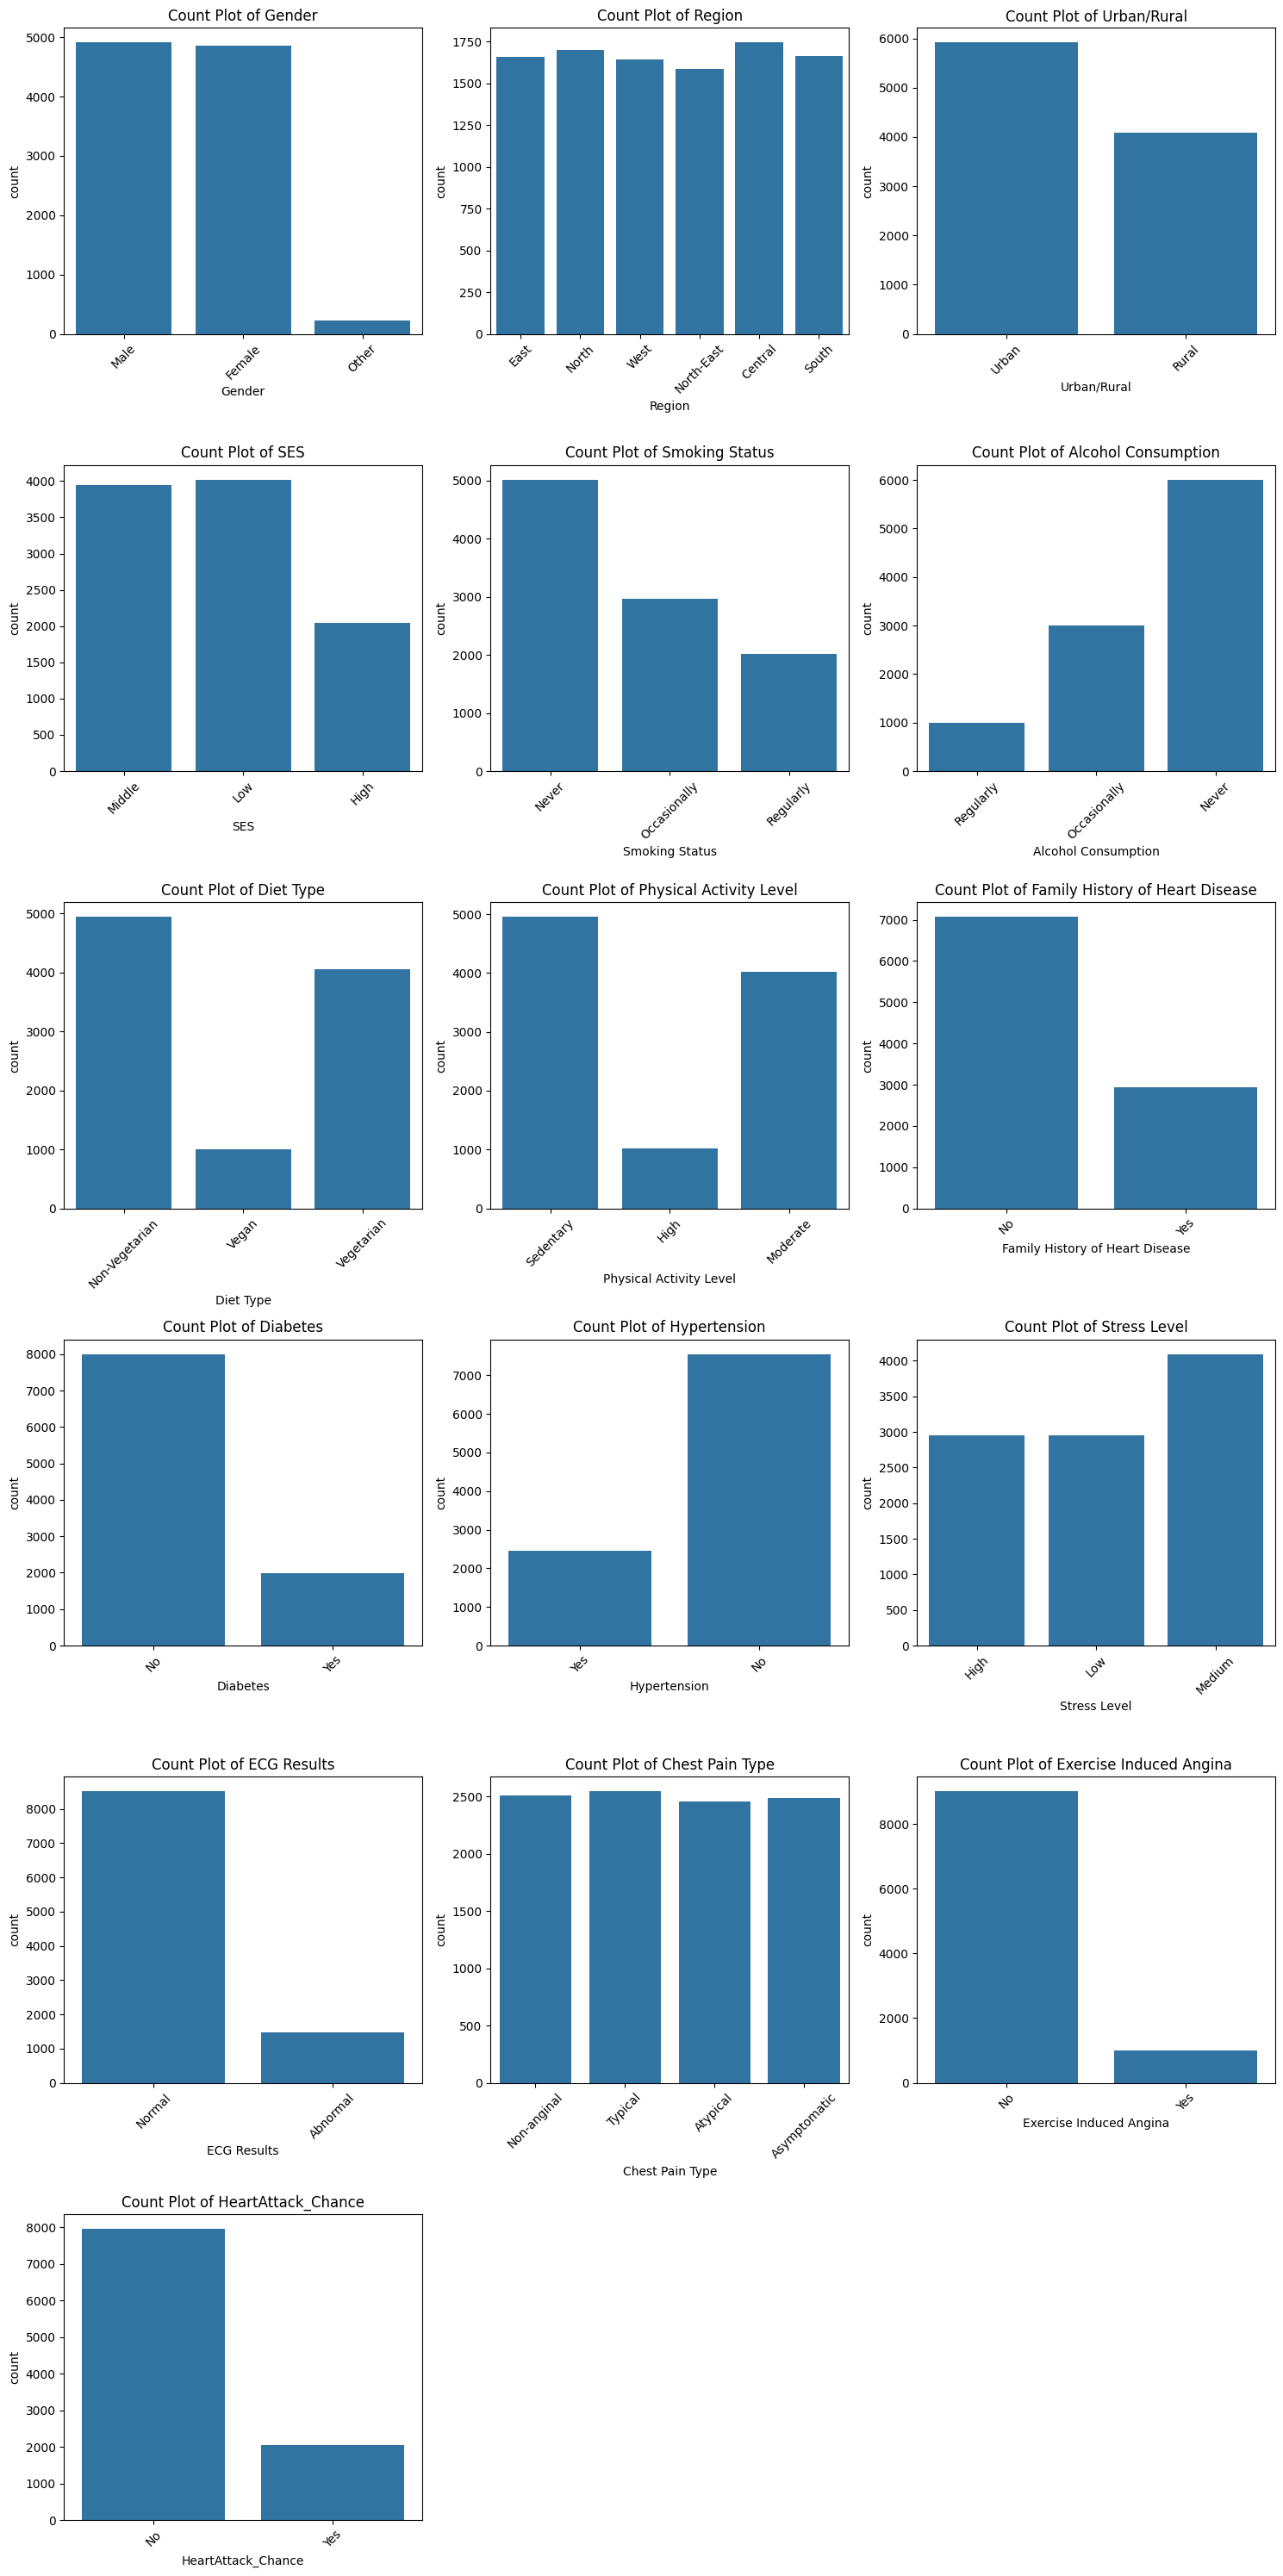

In [9]:
# Select categorical features
categorical_features = data.select_dtypes(include=['object', 'category']).columns

# Number of columns to display in the grid
num_columns = 3  # Adjust as needed (e.g., 3 or 4)
num_plots = len(categorical_features)
num_rows = math.ceil(num_plots / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten axes array for easy iteration if multiple rows
axes = axes.flatten()

# Generate a count plot for each categorical column
for i, column in enumerate(categorical_features):
    sns.countplot(x=column, data=data, ax=axes[i])
    axes[i].set_title(f"Count Plot of {column}")
    axes[i].tick_params(axis='x', rotation=45)

# Turn off any unused subplots
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


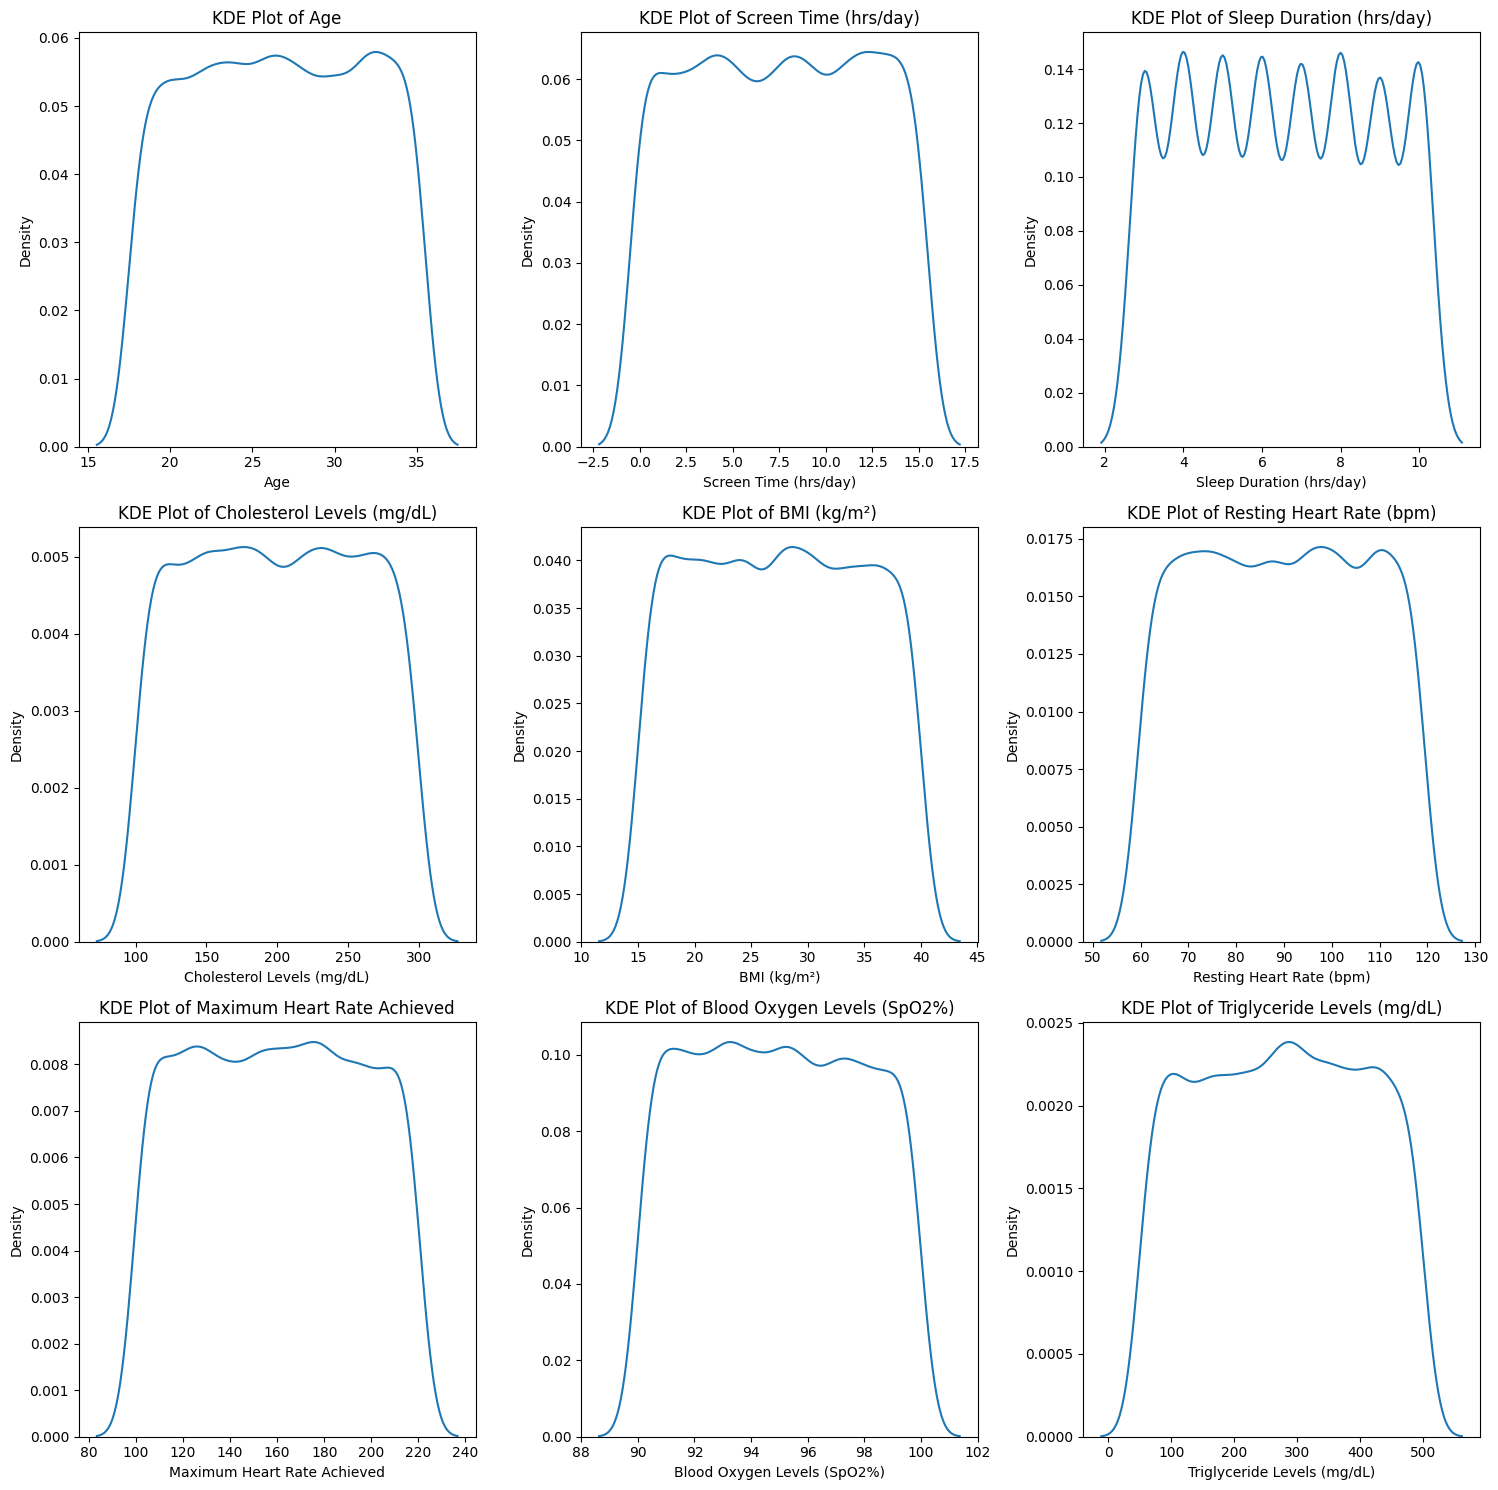

In [10]:
# Select numerical features
numerical_features = data.select_dtypes(include='number').columns

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Counter for subplots
plot_index = 0

# Iterate through numerical features and plot KDE plots
for feature in numerical_features:
    sns.kdeplot(data[feature], ax=axes[plot_index])
    axes[plot_index].set_title(f'KDE Plot of {feature}')
    plot_index += 1

    # If we've filled the 3x3 grid, break the loop
    if plot_index >= len(axes):
        break

# Hide any remaining empty subplots
for i in range(plot_index, len(axes)):
    axes[i].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [11]:
num=data.select_dtypes(include='number').columns.tolist()
data[num].skew()          #The code selects columns with numeric data types from the data DataFrame


Age                           -0.014238
Screen Time (hrs/day)         -0.011737
Sleep Duration (hrs/day)       0.013890
Cholesterol Levels (mg/dL)    -0.000620
BMI (kg/m²)                    0.009420
Resting Heart Rate (bpm)      -0.002111
Maximum Heart Rate Achieved    0.008153
Blood Oxygen Levels (SpO2%)    0.025636
Triglyceride Levels (mg/dL)   -0.011710
Systolic_BP                    0.020026
Diastolic_BP                   0.022435
dtype: float64

In [12]:
data.select_dtypes(include='object').columns

Index(['Gender', 'Region', 'Urban/Rural', 'SES', 'Smoking Status',
       'Alcohol Consumption', 'Diet Type', 'Physical Activity Level',
       'Family History of Heart Disease', 'Diabetes', 'Hypertension',
       'Stress Level', 'ECG Results', 'Chest Pain Type',
       'Exercise Induced Angina', 'HeartAttack_Chance'],
      dtype='object')

In [13]:
data.select_dtypes(include='number').columns  #representing categorical or string data

Index(['Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs/day)',
       'Cholesterol Levels (mg/dL)', 'BMI (kg/m²)', 'Resting Heart Rate (bpm)',
       'Maximum Heart Rate Achieved', 'Blood Oxygen Levels (SpO2%)',
       'Triglyceride Levels (mg/dL)', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')

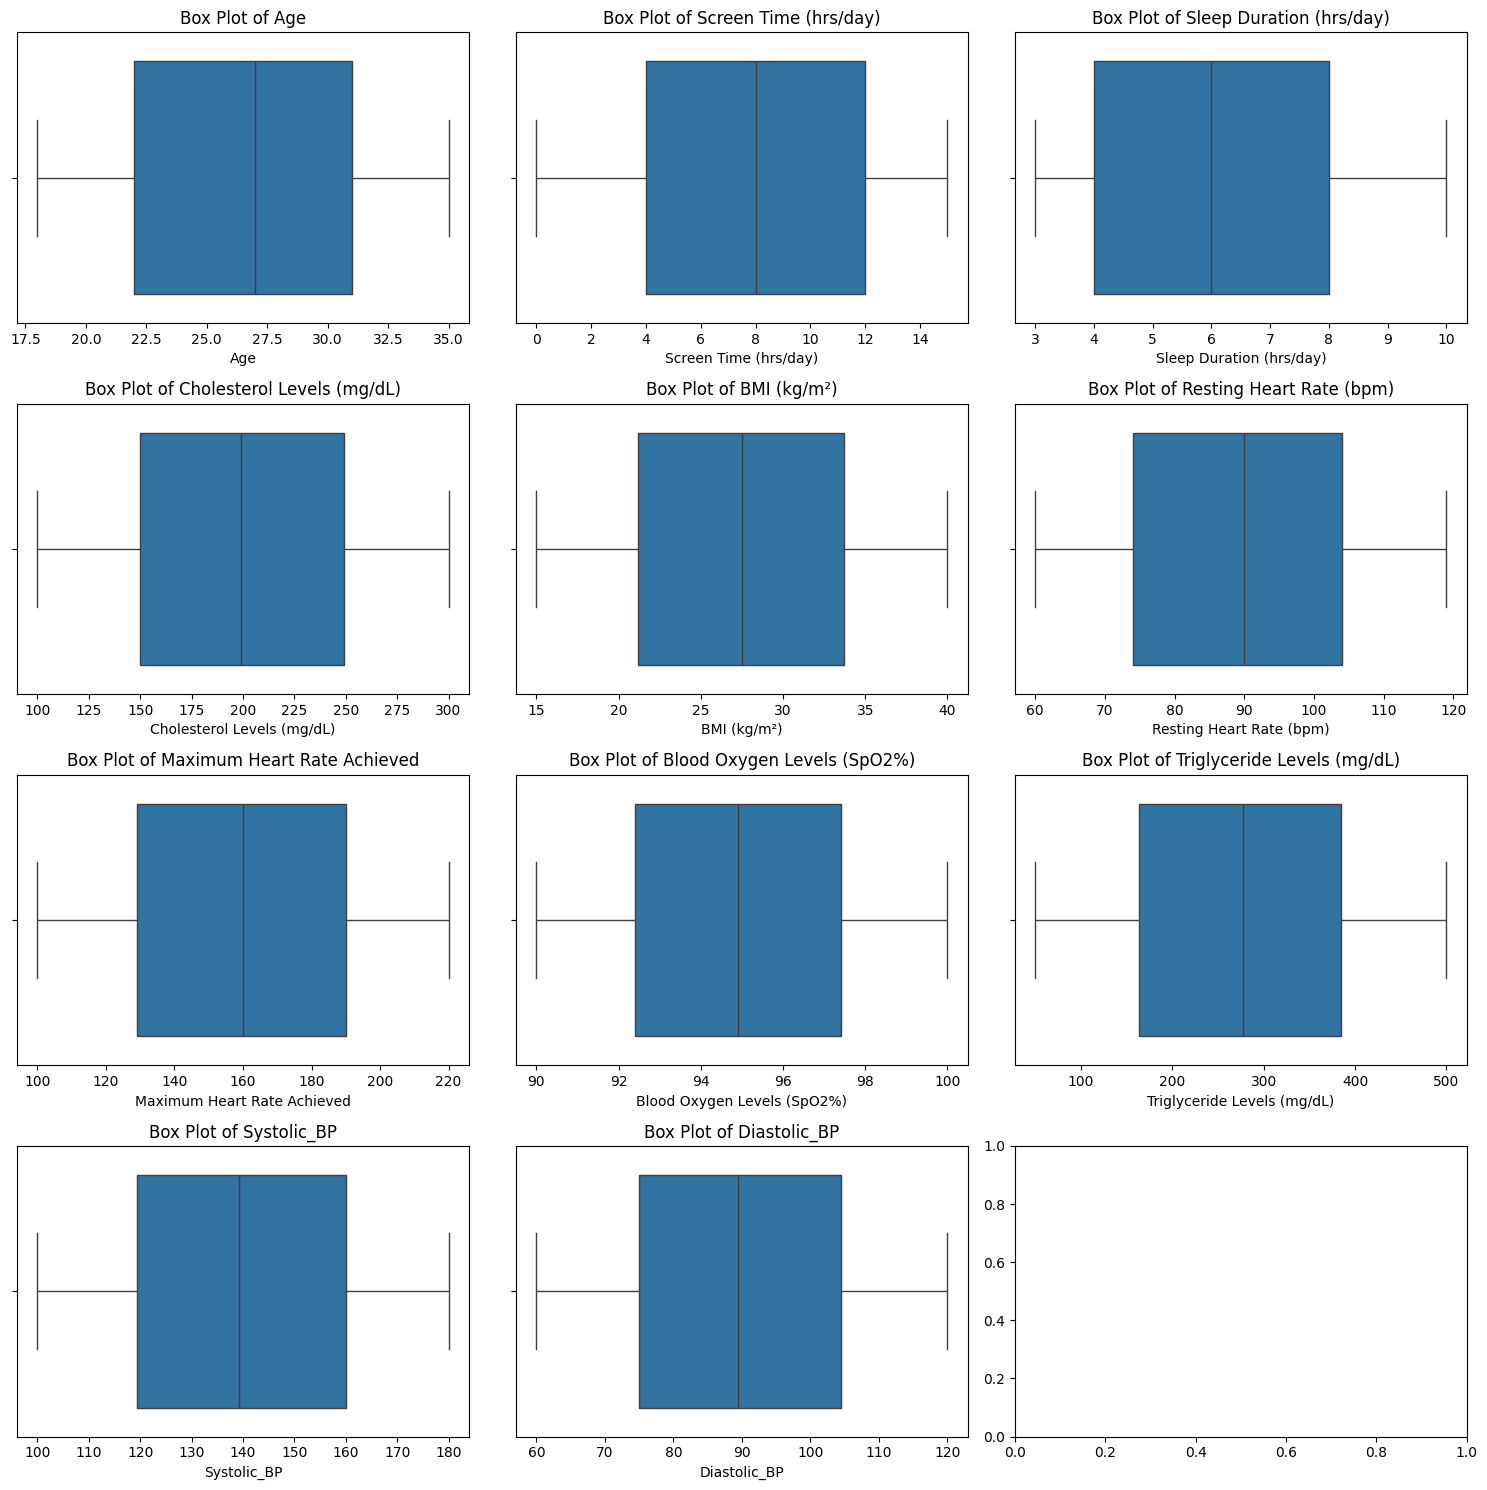

In [14]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 15))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Define numerical_features here
numerical_features = data.select_dtypes(include='number').columns # Select numerical features

# Iterate through numerical features and plot box plots
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data[feature], ax=axes[i])  # Plot on the current subplot
    axes[i].set_title(f'Box Plot of {feature}')  # Set subplot title

# Adjust layout and display the plot
plt.tight_layout()  # Prevent overlapping of subplots
plt.show()

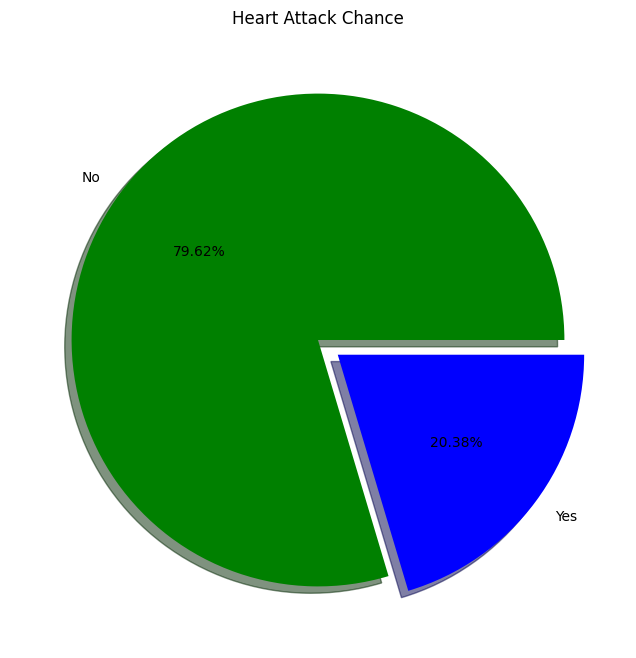

In [15]:
prest =data.HeartAttack_Chance.value_counts() * 100
label=['No','Yes']
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(111)
explode=(0,0.1)
colors=['green','blue']
ax.pie(prest,labels=label,autopct='%1.2f%%',explode=explode,shadow=True,colors=colors)
plt.title('Heart Attack Chance')
plt.show()

In [16]:
data.value_counts('HeartAttack_Chance')

HeartAttack_Chance
No     7962
Yes    2038
Name: count, dtype: int64

## Heatmap of Numerical Features



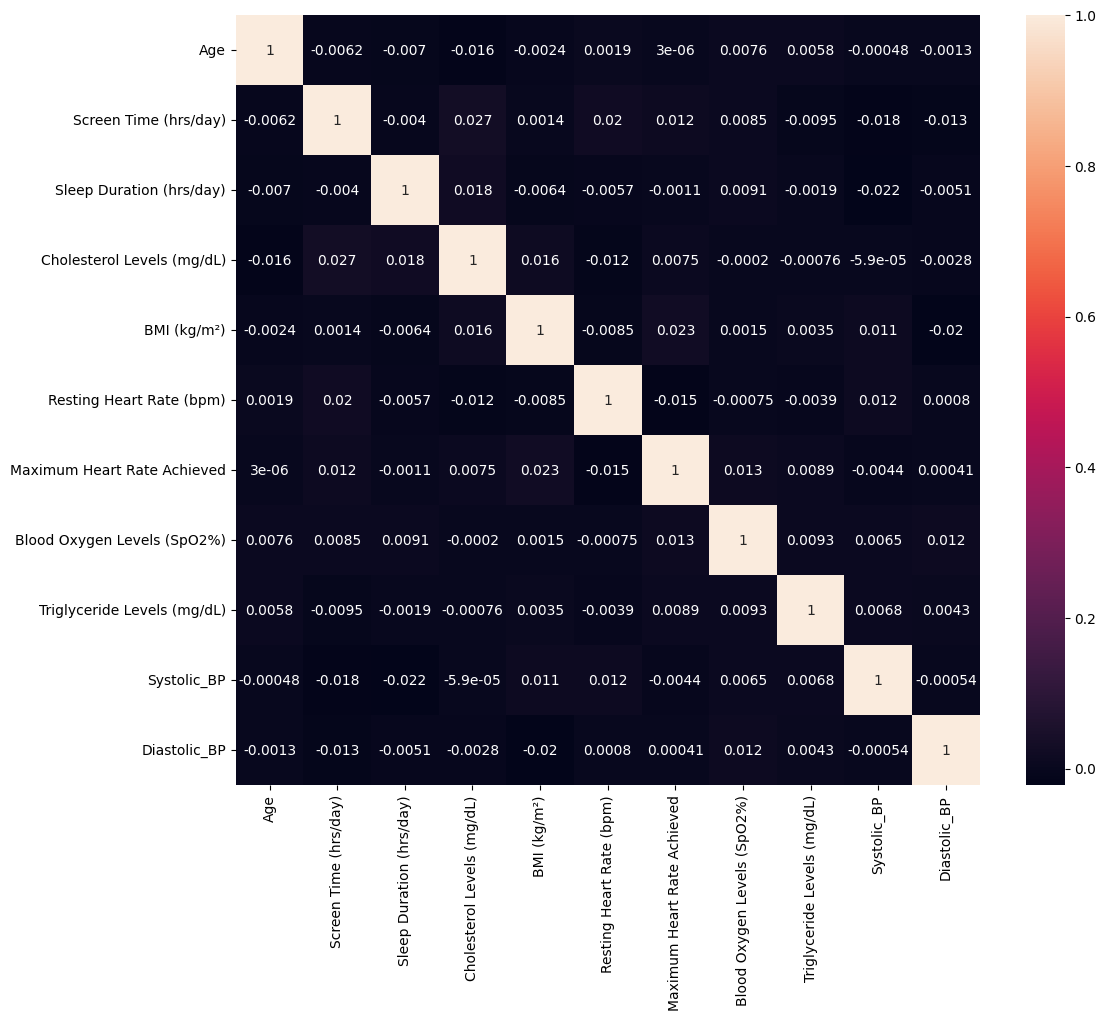

In [17]:
num=data.select_dtypes(include='number')
plt.figure(figsize=(12, 10))
sns.heatmap(data=num.corr(),annot=True)
plt.show()